# Extraction Transformation and Loading Project

In this project I load data from MySQL/AWS to Salesforce using python to process the data

The data was loaded in the following order : Course->class->student->classparticipant->staff->assignment.

From the Entity Relationship Diagram below, since class has two children (staffassignment and class participant) the class data must be loaded before either of the children so the children can extract IDs from class as the parent. However, since class is also a child of course, we need to load course first and then class.

### Entity Relationship diagram

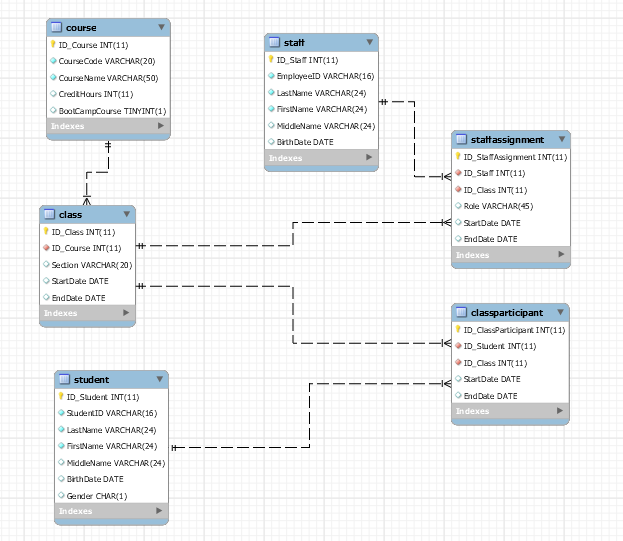

#### Changing directory to locate my config file

In [1]:
import os
orig_working_directory=os.getcwd()
orig_working_directory

'C:\\Users\\clemi\\Desktop\\Clementine-GWU-HW\\ETL_Project'

In [2]:
os.chdir(os.path.join('..'))
curr_working_directory=os.getcwd()
curr_working_directory

'C:\\Users\\clemi\\Desktop\\Clementine-GWU-HW'

### Import Dependencies

In [3]:
import json
from sqlalchemy import create_engine
import pandas as pd
import pymysql
pymysql.install_as_MySQLdb()

### Import configuration variables

In [4]:
from salesforce_config import sf_username, sf_password, sf_security_token
from salesforce_config import remote_db_endpoint, remote_db_port
from salesforce_config import remote_db_name, remote_db_user, remote_db_pwd

### Set up simple_salesforce

In [5]:
from simple_salesforce import Salesforce
sf = Salesforce(username=sf_username, password=sf_password, security_token=sf_security_token)

### Connect to your MySQL database

In [6]:
engine = create_engine(f"mysql://{remote_db_user}:{remote_db_pwd}@{remote_db_endpoint}:{remote_db_port}/{remote_db_name}")
conn = engine.connect()

### Drop Existing records from objects in Salesforce

Because Salesforce does not replace records but adds on everytime the code is run, I set up the notebook to delete the records from saleforce objects each time this notebook is run.

#### Drop records from Student table

In [7]:
student_records = sf.query("SELECT Id FROM Student__c")
recs_to_delete = [{'Id': r['Id']} for r in student_records['records']]
recs_to_delete

[{'Id': 'a0A3h000002c8bsEAA'},
 {'Id': 'a0A3h000002c8btEAA'},
 {'Id': 'a0A3h000002c8buEAA'},
 {'Id': 'a0A3h000002c8bvEAA'},
 {'Id': 'a0A3h000002c8bwEAA'},
 {'Id': 'a0A3h000002c8bxEAA'},
 {'Id': 'a0A3h000002c8byEAA'},
 {'Id': 'a0A3h000002c8bzEAA'},
 {'Id': 'a0A3h000002c8c0EAA'},
 {'Id': 'a0A3h000002c8c1EAA'},
 {'Id': 'a0A3h000002c8c2EAA'},
 {'Id': 'a0A3h000002c8c3EAA'},
 {'Id': 'a0A3h000002c8c4EAA'},
 {'Id': 'a0A3h000002c8c5EAA'},
 {'Id': 'a0A3h000002c8c6EAA'},
 {'Id': 'a0A3h000002c8c7EAA'},
 {'Id': 'a0A3h000002c8c8EAA'},
 {'Id': 'a0A3h000002c8c9EAA'},
 {'Id': 'a0A3h000002c8cAEAQ'},
 {'Id': 'a0A3h000002c8cBEAQ'},
 {'Id': 'a0A3h000002c8cCEAQ'},
 {'Id': 'a0A3h000002c8cDEAQ'},
 {'Id': 'a0A3h000002c8cEEAQ'},
 {'Id': 'a0A3h000002c8cFEAQ'},
 {'Id': 'a0A3h000002c8cGEAQ'},
 {'Id': 'a0A3h000002c8cHEAQ'},
 {'Id': 'a0A3h000002c8cIEAQ'},
 {'Id': 'a0A3h000002c8cJEAQ'},
 {'Id': 'a0A3h000002c8cKEAQ'},
 {'Id': 'a0A3h000002c8cLEAQ'}]

In [8]:
sf.bulk.Student__c.delete(recs_to_delete)

[{'success': True, 'created': False, 'id': 'a0A3h000002c8bsEAA', 'errors': []},
 {'success': True, 'created': False, 'id': 'a0A3h000002c8btEAA', 'errors': []},
 {'success': True, 'created': False, 'id': 'a0A3h000002c8buEAA', 'errors': []},
 {'success': True, 'created': False, 'id': 'a0A3h000002c8bvEAA', 'errors': []},
 {'success': True, 'created': False, 'id': 'a0A3h000002c8bwEAA', 'errors': []},
 {'success': True, 'created': False, 'id': 'a0A3h000002c8bxEAA', 'errors': []},
 {'success': True, 'created': False, 'id': 'a0A3h000002c8byEAA', 'errors': []},
 {'success': True, 'created': False, 'id': 'a0A3h000002c8bzEAA', 'errors': []},
 {'success': True, 'created': False, 'id': 'a0A3h000002c8c0EAA', 'errors': []},
 {'success': True, 'created': False, 'id': 'a0A3h000002c8c1EAA', 'errors': []},
 {'success': True, 'created': False, 'id': 'a0A3h000002c8c2EAA', 'errors': []},
 {'success': True, 'created': False, 'id': 'a0A3h000002c8c3EAA', 'errors': []},
 {'success': True, 'created': False, 'id

#### Drop Existing records in Class Participant object in Salesforce

We technically do not need code for this or any object that is a child of another object because deleting the records from the parent automatically deletes the data in the child but I have this here in case that table is loaded independently for exploration reasons

In [9]:
class_part_records = sf.query("SELECT Id FROM ClassParticipant__c")
recs_to_delete = [{'Id': r['Id']} for r in class_part_records['records']]
recs_to_delete

[]

In [10]:
sf.bulk.ClassParticipant__c.delete(recs_to_delete)

[]

#### Drop Existing records in Course table Salesforce

In [11]:
course_records = sf.query("SELECT Id FROM Course__c")
recs_to_delete = [{'Id': r['Id']} for r in course_records['records']]
recs_to_delete

[{'Id': 'a0G3h00000120VCEAY'},
 {'Id': 'a0G3h00000120VDEAY'},
 {'Id': 'a0G3h00000120VEEAY'},
 {'Id': 'a0G3h00000120VFEAY'},
 {'Id': 'a0G3h00000120VGEAY'},
 {'Id': 'a0G3h00000120VHEAY'},
 {'Id': 'a0G3h00000120VIEAY'},
 {'Id': 'a0G3h00000120VJEAY'}]

In [12]:
sf.bulk.Course__c.delete(recs_to_delete)

[{'success': True, 'created': False, 'id': 'a0G3h00000120VCEAY', 'errors': []},
 {'success': True, 'created': False, 'id': 'a0G3h00000120VDEAY', 'errors': []},
 {'success': True, 'created': False, 'id': 'a0G3h00000120VEEAY', 'errors': []},
 {'success': True, 'created': False, 'id': 'a0G3h00000120VFEAY', 'errors': []},
 {'success': True, 'created': False, 'id': 'a0G3h00000120VGEAY', 'errors': []},
 {'success': True, 'created': False, 'id': 'a0G3h00000120VHEAY', 'errors': []},
 {'success': True, 'created': False, 'id': 'a0G3h00000120VIEAY', 'errors': []},
 {'success': True, 'created': False, 'id': 'a0G3h00000120VJEAY', 'errors': []}]

#### Drop Existing records in Class object in Salesforce

We technically do not need code for this or any object that is a child of another object because deleting the records from the parent automatically deletes the data in the child but I have this here in case that table is loaded independently for exploration reasons

In [13]:
class_records = sf.query("SELECT Id FROM class__c")
recs_to_delete = [{'Id': r['Id']} for r in class_records['records']]
recs_to_delete

[]

In [14]:
sf.bulk.class__c.delete(recs_to_delete)

[]

#### Drop existing records in Staff object in Salesforce

In [15]:
staff_records = sf.query("SELECT Id FROM Staff__c")
recs_to_delete = [{'Id': r['Id']} for r in staff_records['records']]
recs_to_delete

[{'Id': 'a0I3h0000007dknEAA'},
 {'Id': 'a0I3h0000007dkoEAA'},
 {'Id': 'a0I3h0000007dkpEAA'},
 {'Id': 'a0I3h0000007dkqEAA'}]

In [16]:
sf.bulk.Staff__c.delete(recs_to_delete)

[{'success': True, 'created': False, 'id': 'a0I3h0000007dknEAA', 'errors': []},
 {'success': True, 'created': False, 'id': 'a0I3h0000007dkoEAA', 'errors': []},
 {'success': True, 'created': False, 'id': 'a0I3h0000007dkpEAA', 'errors': []},
 {'success': True, 'created': False, 'id': 'a0I3h0000007dkqEAA', 'errors': []}]

#### Drop Existing records in Staff Assignment object in Salesforce

We technically do not need code for this or any object that is a child of another object because deleting the records from the parent automatically deletes the data in the child but I have this here in case that table is loaded independently for exploration reasons

In [17]:
staff_assignment_records = sf.query("SELECT Id FROM StaffAssignment__c")
recs_to_delete = [{'Id': r['Id']} for r in staff_assignment_records['records']]
recs_to_delete

[]

In [18]:
sf.bulk.StaffAssignment__c.delete(recs_to_delete)

[]

## Course Data

### Query data 

In [19]:
course_data = pd.read_sql("SELECT * FROM course", conn)
course_data.head(2)

,ID_Course,CourseCode,CourseName,CreditHours,BootCampCourse
0,1,BC-DATAVIZ,Data Visualization and Analytics,12,1
1,2,BC-WEBDEV,Full Stack Web Development,12,1


### Rename Columns

All primary keys should be renamed "Name" so it matches with Salesforce. In Salesforce, the default field name for the primary key in Salesforce is "Name"

In [20]:
course_data=course_data.rename(columns={"ID_Course":"Name","CourseCode":"CourseCode__c","CourseName":"CourseName__c",
                                       "CreditHours":"CreditHours__c","BootCampCourse":"BootCampCourse__c"})
course_data.head()

,Name,CourseCode__c,CourseName__c,CreditHours__c,BootCampCourse__c
0,1,BC-DATAVIZ,Data Visualization and Analytics,12,1
1,2,BC-WEBDEV,Full Stack Web Development,12,1
2,3,BC-UIUX,User Interface/User Experience,12,1
3,4,CIS-349,Introduction to Databases,5,0
4,5,CIS-405,Database Programming,5,0


### Convert DataFrame to a list of Dictionaries

In [21]:
course_load = course_data.to_dict('records')
course_load

[{'Name': 1,
  'CourseCode__c': 'BC-DATAVIZ',
  'CourseName__c': 'Data Visualization and Analytics',
  'CreditHours__c': 12,
  'BootCampCourse__c': 1},
 {'Name': 2,
  'CourseCode__c': 'BC-WEBDEV',
  'CourseName__c': 'Full Stack Web Development',
  'CreditHours__c': 12,
  'BootCampCourse__c': 1},
 {'Name': 3,
  'CourseCode__c': 'BC-UIUX',
  'CourseName__c': 'User Interface/User Experience',
  'CreditHours__c': 12,
  'BootCampCourse__c': 1},
 {'Name': 4,
  'CourseCode__c': 'CIS-349',
  'CourseName__c': 'Introduction to Databases',
  'CreditHours__c': 5,
  'BootCampCourse__c': 0},
 {'Name': 5,
  'CourseCode__c': 'CIS-405',
  'CourseName__c': 'Database Programming',
  'CreditHours__c': 5,
  'BootCampCourse__c': 0},
 {'Name': 6,
  'CourseCode__c': 'CIS-438',
  'CourseName__c': 'Database Administration',
  'CreditHours__c': 5,
  'BootCampCourse__c': 0},
 {'Name': 7,
  'CourseCode__c': 'CIS-430',
  'CourseName__c': 'Business Systems Programming I',
  'CreditHours__c': 5,
  'BootCampCourse__c'

### Inserting rows in bulk

In [22]:
try:
    sf.bulk.Course__c.insert(course_load)
except Exception as e:
    print(e)

# Class data

In [23]:
class_data = pd.read_sql("SELECT * FROM class", conn)
class_data.head(5)

,ID_Class,ID_Course,Section,StartDate,EndDate
0,1,1,GWU-ARL-DATA-PT-09-0,2020-03-16,2020-03-14
1,2,1,GWDC201805DATA3,2018-05-15,2018-11-08
2,3,2,GWARL201905WEB3,2019-05-14,2019-11-07
3,4,3,GWARL201905UIUX3,2019-05-14,2019-11-07


In [24]:
class_data=class_data.rename(columns={"ID_Class":"Name","ID_Course":"ID_Course__c","Section":"Section__c",
                                      "StartDate":"StartDate__c","EndDate":"EndDate__c"})

class_data.head(5)

,Name,ID_Course__c,Section__c,StartDate__c,EndDate__c
0,1,1,GWU-ARL-DATA-PT-09-0,2020-03-16,2020-03-14
1,2,1,GWDC201805DATA3,2018-05-15,2018-11-08
2,3,2,GWARL201905WEB3,2019-05-14,2019-11-07
3,4,3,GWARL201905UIUX3,2019-05-14,2019-11-07


In [25]:
class_data["StartDate__c"]=class_data["StartDate__c"].astype(str)
class_data["EndDate__c"]=class_data["EndDate__c"].astype(str)

### Extract Record ID

In order for salesforce to recognize that the class table is connected to the Course table, we have to make sure to set a master-detail relationship in the child (in this case the class object) linking it to Course object. The master detail relationship has to be set on the foreign key. In this case "ID_Course__c" is the foreign key linking the class onject to the Course object. To solidify this link, we need to extract the salesforce record ID for the course object to replace the values in the ID_Course__c column/field in the class object

In [26]:
course_query=sf.query("SELECT Name from Course__c")

In [27]:
course_query

OrderedDict([('totalSize', 8),
             ('done', True),
             ('records',
              [OrderedDict([('attributes',
                             OrderedDict([('type', 'Course__c'),
                                          ('url',
                                           '/services/data/v42.0/sobjects/Course__c/a0G3h00000120XzEAI')])),
                            ('Name', '1')]),
               OrderedDict([('attributes',
                             OrderedDict([('type', 'Course__c'),
                                          ('url',
                                           '/services/data/v42.0/sobjects/Course__c/a0G3h00000120Y0EAI')])),
                            ('Name', '2')]),
               OrderedDict([('attributes',
                             OrderedDict([('type', 'Course__c'),
                                          ('url',
                                           '/services/data/v42.0/sobjects/Course__c/a0G3h00000120Y1EAI')])),
                        

In [28]:
course_dict={}
x=0
while x< len(course_query['records']):
    url=course_query['records'][x]['attributes']['url'].split('/')[6]
    course_id=int(course_query['records'][x]['Name'])
    print(url,course_id)
    course_dict[course_id]=url
    x=x+1
print(course_dict)

a0G3h00000120XzEAI 1
a0G3h00000120Y0EAI 2
a0G3h00000120Y1EAI 3
a0G3h00000120Y2EAI 4
a0G3h00000120Y3EAI 5
a0G3h00000120Y4EAI 6
a0G3h00000120Y5EAI 7
a0G3h00000120Y6EAI 8
{1: 'a0G3h00000120XzEAI', 2: 'a0G3h00000120Y0EAI', 3: 'a0G3h00000120Y1EAI', 4: 'a0G3h00000120Y2EAI', 5: 'a0G3h00000120Y3EAI', 6: 'a0G3h00000120Y4EAI', 7: 'a0G3h00000120Y5EAI', 8: 'a0G3h00000120Y6EAI'}


In [29]:
for index,row in class_data.iterrows():
    try:
        class_data['ID_Course__c'][index]=course_dict[row['ID_Course__c']]
        
    except KeyError as e:
        print(e)
class_data

C:\Users\clemi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\clemi\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Name,ID_Course__c,Section__c,StartDate__c,EndDate__c
0,1,a0G3h00000120XzEAI,GWU-ARL-DATA-PT-09-0,2020-03-16,2020-03-14
1,2,a0G3h00000120XzEAI,GWDC201805DATA3,2018-05-15,2018-11-08
2,3,a0G3h00000120Y0EAI,GWARL201905WEB3,2019-05-14,2019-11-07
3,4,a0G3h00000120Y1EAI,GWARL201905UIUX3,2019-05-14,2019-11-07


In [30]:
class_load = class_data.to_dict('records')
class_load

[{'Name': 1,
  'ID_Course__c': 'a0G3h00000120XzEAI',
  'Section__c': 'GWU-ARL-DATA-PT-09-0',
  'StartDate__c': '2020-03-16',
  'EndDate__c': '2020-03-14'},
 {'Name': 2,
  'ID_Course__c': 'a0G3h00000120XzEAI',
  'Section__c': 'GWDC201805DATA3',
  'StartDate__c': '2018-05-15',
  'EndDate__c': '2018-11-08'},
 {'Name': 3,
  'ID_Course__c': 'a0G3h00000120Y0EAI',
  'Section__c': 'GWARL201905WEB3',
  'StartDate__c': '2019-05-14',
  'EndDate__c': '2019-11-07'},
 {'Name': 4,
  'ID_Course__c': 'a0G3h00000120Y1EAI',
  'Section__c': 'GWARL201905UIUX3',
  'StartDate__c': '2019-05-14',
  'EndDate__c': '2019-11-07'}]

In [31]:
try:
    sf.bulk.class__c.insert(class_load)
except Exception as e:
    print(e)

# Student Data

### Query Data

In [32]:
student_data = pd.read_sql("SELECT * FROM student", conn)
student_data.head(5)

,ID_Student,StudentID,LastName,FirstName,MiddleName,BirthDate,Gender
0,33,25004961,Moore,Heather,Alice,None,F
1,34,25003514,Multak,Ilana,Cecille,None,F
2,35,25005833,Murillo,Jessica,Dorothy,None,F
3,36,25002589,Romanowski,Kandra,Genevieve,None,F
4,37,25007185,Hoffer,Katherine,Lynnette,None,F


In [33]:
#student_data['FullName'] = student_data['FirstName'].str.cat(student_data['LastName'], sep=" ")
student_data=student_data.rename(columns={"ID_Student":"Name","StudentID":"StudentID__c","LastName":"LastName__c",
                                       "FirstName":"FirstName__c","MiddleName":"MiddleName__c","Gender":"Gender__c",
                                        "BirthDate":"BirthDate__c"})
student_data.head(5)

,Name,StudentID__c,LastName__c,FirstName__c,MiddleName__c,BirthDate__c,Gender__c
0,33,25004961,Moore,Heather,Alice,None,F
1,34,25003514,Multak,Ilana,Cecille,None,F
2,35,25005833,Murillo,Jessica,Dorothy,None,F
3,36,25002589,Romanowski,Kandra,Genevieve,None,F
4,37,25007185,Hoffer,Katherine,Lynnette,None,F


### Convert DataFrame to a list of Dictionaries

In [34]:
student_load = student_data.to_dict('records')
student_load

[{'Name': 33,
  'StudentID__c': '25004961',
  'LastName__c': 'Moore',
  'FirstName__c': 'Heather',
  'MiddleName__c': 'Alice',
  'BirthDate__c': None,
  'Gender__c': 'F'},
 {'Name': 34,
  'StudentID__c': '25003514',
  'LastName__c': 'Multak',
  'FirstName__c': 'Ilana',
  'MiddleName__c': 'Cecille',
  'BirthDate__c': None,
  'Gender__c': 'F'},
 {'Name': 35,
  'StudentID__c': '25005833',
  'LastName__c': 'Murillo',
  'FirstName__c': 'Jessica',
  'MiddleName__c': 'Dorothy',
  'BirthDate__c': None,
  'Gender__c': 'F'},
 {'Name': 36,
  'StudentID__c': '25002589',
  'LastName__c': 'Romanowski',
  'FirstName__c': 'Kandra',
  'MiddleName__c': 'Genevieve',
  'BirthDate__c': None,
  'Gender__c': 'F'},
 {'Name': 37,
  'StudentID__c': '25007185',
  'LastName__c': 'Hoffer',
  'FirstName__c': 'Katherine',
  'MiddleName__c': 'Lynnette',
  'BirthDate__c': None,
  'Gender__c': 'F'},
 {'Name': 38,
  'StudentID__c': '25006014',
  'LastName__c': 'Poocharoen',
  'FirstName__c': 'Pariya',
  'MiddleName__c':

In [35]:
#Inserting rows in bulk

In [36]:
try:
    sf.bulk.Student__c.insert(student_load) #Student__c is the API name
except Exception as e:
    print(e)

### Class participant

In [37]:
participant_data = pd.read_sql("SELECT * FROM classparticipant", conn)
participant_data.head(4)

,ID_ClassParticipant,ID_Student,ID_Class,StartDate,EndDate
0,1,33,1,2020-03-16,None
1,2,34,1,2020-03-16,None
2,3,35,1,2020-03-16,None
3,4,62,1,2020-03-16,None


In [38]:
participant_data=participant_data.rename(columns={"ID_ClassParticipant":"Name","ID_Student":"ID_Student__c",
                                        "ID_Class":"ID_Class__c","StartDate":"StartDate__c","EndDate":"EndDate__c"})
#convert date to string otherwise we will get JSON nonserilizable error
participant_data["StartDate__c"]=participant_data["StartDate__c"].astype(str)
participant_data.head()

,Name,ID_Student__c,ID_Class__c,StartDate__c,EndDate__c
0,1,33,1,2020-03-16,None
1,2,34,1,2020-03-16,None
2,3,35,1,2020-03-16,None
3,4,62,1,2020-03-16,None
4,5,36,1,2020-03-16,None


In [39]:
#Extract Record ID for student

In [40]:
student_query=sf.query("SELECT Name from Student__c")
student_query

OrderedDict([('totalSize', 30),
             ('done', True),
             ('records',
              [OrderedDict([('attributes',
                             OrderedDict([('type', 'Student__c'),
                                          ('url',
                                           '/services/data/v42.0/sobjects/Student__c/a0A3h000002c8cqEAA')])),
                            ('Name', '33')]),
               OrderedDict([('attributes',
                             OrderedDict([('type', 'Student__c'),
                                          ('url',
                                           '/services/data/v42.0/sobjects/Student__c/a0A3h000002c8crEAA')])),
                            ('Name', '34')]),
               OrderedDict([('attributes',
                             OrderedDict([('type', 'Student__c'),
                                          ('url',
                                           '/services/data/v42.0/sobjects/Student__c/a0A3h000002c8csEAA')])),
               

In [41]:
student_dict={}
x=0
while x< len(student_query['records']):
    url=student_query['records'][x]['attributes']['url'].split('/')[6]
    student_id=int(student_query['records'][x]['Name'])
    print(url,student_id)
    student_dict[student_id]=url
    x=x+1
print(student_dict)

a0A3h000002c8cqEAA 33
a0A3h000002c8crEAA 34
a0A3h000002c8csEAA 35
a0A3h000002c8ctEAA 36
a0A3h000002c8cuEAA 37
a0A3h000002c8cvEAA 38
a0A3h000002c8cwEAA 39
a0A3h000002c8cxEAA 40
a0A3h000002c8cyEAA 41
a0A3h000002c8czEAA 42
a0A3h000002c8d0EAA 43
a0A3h000002c8d1EAA 44
a0A3h000002c8d2EAA 45
a0A3h000002c8d3EAA 46
a0A3h000002c8d4EAA 47
a0A3h000002c8d5EAA 48
a0A3h000002c8d6EAA 49
a0A3h000002c8d7EAA 50
a0A3h000002c8d8EAA 51
a0A3h000002c8d9EAA 52
a0A3h000002c8dAEAQ 53
a0A3h000002c8dBEAQ 54
a0A3h000002c8dCEAQ 55
a0A3h000002c8dDEAQ 56
a0A3h000002c8dEEAQ 57
a0A3h000002c8dFEAQ 58
a0A3h000002c8dGEAQ 59
a0A3h000002c8dHEAQ 60
a0A3h000002c8dIEAQ 61
a0A3h000002c8dJEAQ 62
{33: 'a0A3h000002c8cqEAA', 34: 'a0A3h000002c8crEAA', 35: 'a0A3h000002c8csEAA', 36: 'a0A3h000002c8ctEAA', 37: 'a0A3h000002c8cuEAA', 38: 'a0A3h000002c8cvEAA', 39: 'a0A3h000002c8cwEAA', 40: 'a0A3h000002c8cxEAA', 41: 'a0A3h000002c8cyEAA', 42: 'a0A3h000002c8czEAA', 43: 'a0A3h000002c8d0EAA', 44: 'a0A3h000002c8d1EAA', 45: 'a0A3h000002c8d2EAA', 4

In [42]:
for index,row in participant_data.iterrows():
    participant_data['ID_Student__c'][index]=student_dict[row['ID_Student__c']]
participant_data

C:\Users\clemi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,ID_Student__c,ID_Class__c,StartDate__c,EndDate__c
0,1,a0A3h000002c8cqEAA,1,2020-03-16,None
1,2,a0A3h000002c8crEAA,1,2020-03-16,None
2,3,a0A3h000002c8csEAA,1,2020-03-16,None
3,4,a0A3h000002c8dJEAQ,1,2020-03-16,None
4,5,a0A3h000002c8ctEAA,1,2020-03-16,None
5,6,a0A3h000002c8cuEAA,1,2020-03-16,None
6,7,a0A3h000002c8cvEAA,1,2020-03-16,None
7,8,a0A3h000002c8cwEAA,1,2020-03-16,None
8,9,a0A3h000002c8cxEAA,1,2020-03-16,None
9,10,a0A3h000002c8cyEAA,1,2020-03-16,None


In [43]:
#Obtaining ID_Class record IDs and 

In [44]:
class_query=sf.query("SELECT Name from class__c")
class_query

OrderedDict([('totalSize', 4),
             ('done', True),
             ('records',
              [OrderedDict([('attributes',
                             OrderedDict([('type', 'class__c'),
                                          ('url',
                                           '/services/data/v42.0/sobjects/class__c/a0F3h0000026uxuEAA')])),
                            ('Name', '1')]),
               OrderedDict([('attributes',
                             OrderedDict([('type', 'class__c'),
                                          ('url',
                                           '/services/data/v42.0/sobjects/class__c/a0F3h0000026uxvEAA')])),
                            ('Name', '2')]),
               OrderedDict([('attributes',
                             OrderedDict([('type', 'class__c'),
                                          ('url',
                                           '/services/data/v42.0/sobjects/class__c/a0F3h0000026uxwEAA')])),
                            ('

In [45]:
class_dict={}
x=0
while x< len(class_query['records']):
    url=class_query['records'][x]['attributes']['url'].split('/')[6]
    class_id=int(class_query['records'][x]['Name'])
    print(url,class_id)
    class_dict[class_id]=url
    x=x+1
print(class_dict)

a0F3h0000026uxuEAA 1
a0F3h0000026uxvEAA 2
a0F3h0000026uxwEAA 3
a0F3h0000026uxxEAA 4
{1: 'a0F3h0000026uxuEAA', 2: 'a0F3h0000026uxvEAA', 3: 'a0F3h0000026uxwEAA', 4: 'a0F3h0000026uxxEAA'}


In [46]:
for index,row in participant_data.iterrows():
    try:
        participant_data['ID_Class__c'][index]=class_dict[row['ID_Class__c']]
    except KeyError as e:
        print(e)
participant_data

C:\Users\clemi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Name,ID_Student__c,ID_Class__c,StartDate__c,EndDate__c
0,1,a0A3h000002c8cqEAA,a0F3h0000026uxuEAA,2020-03-16,None
1,2,a0A3h000002c8crEAA,a0F3h0000026uxuEAA,2020-03-16,None
2,3,a0A3h000002c8csEAA,a0F3h0000026uxuEAA,2020-03-16,None
3,4,a0A3h000002c8dJEAQ,a0F3h0000026uxuEAA,2020-03-16,None
4,5,a0A3h000002c8ctEAA,a0F3h0000026uxuEAA,2020-03-16,None
5,6,a0A3h000002c8cuEAA,a0F3h0000026uxuEAA,2020-03-16,None
6,7,a0A3h000002c8cvEAA,a0F3h0000026uxuEAA,2020-03-16,None
7,8,a0A3h000002c8cwEAA,a0F3h0000026uxuEAA,2020-03-16,None
8,9,a0A3h000002c8cxEAA,a0F3h0000026uxuEAA,2020-03-16,None
9,10,a0A3h000002c8cyEAA,a0F3h0000026uxuEAA,2020-03-16,None


In [47]:
participant_load = participant_data.to_dict('records')
participant_load

[{'Name': 1,
  'ID_Student__c': 'a0A3h000002c8cqEAA',
  'ID_Class__c': 'a0F3h0000026uxuEAA',
  'StartDate__c': '2020-03-16',
  'EndDate__c': None},
 {'Name': 2,
  'ID_Student__c': 'a0A3h000002c8crEAA',
  'ID_Class__c': 'a0F3h0000026uxuEAA',
  'StartDate__c': '2020-03-16',
  'EndDate__c': None},
 {'Name': 3,
  'ID_Student__c': 'a0A3h000002c8csEAA',
  'ID_Class__c': 'a0F3h0000026uxuEAA',
  'StartDate__c': '2020-03-16',
  'EndDate__c': None},
 {'Name': 4,
  'ID_Student__c': 'a0A3h000002c8dJEAQ',
  'ID_Class__c': 'a0F3h0000026uxuEAA',
  'StartDate__c': '2020-03-16',
  'EndDate__c': None},
 {'Name': 5,
  'ID_Student__c': 'a0A3h000002c8ctEAA',
  'ID_Class__c': 'a0F3h0000026uxuEAA',
  'StartDate__c': '2020-03-16',
  'EndDate__c': None},
 {'Name': 6,
  'ID_Student__c': 'a0A3h000002c8cuEAA',
  'ID_Class__c': 'a0F3h0000026uxuEAA',
  'StartDate__c': '2020-03-16',
  'EndDate__c': None},
 {'Name': 7,
  'ID_Student__c': 'a0A3h000002c8cvEAA',
  'ID_Class__c': 'a0F3h0000026uxuEAA',
  'StartDate__c': '

In [48]:
#Inserting rows in bulk

In [49]:
try:
    sf.bulk.ClassParticipant__c.insert(participant_load)
except Exception as e:
    print(e)

# Staff

In [50]:
staff_data = pd.read_sql("SELECT * FROM staff", conn)
staff_data.head(5)

,ID_Staff,EmployeeID,LastName,FirstName,MiddleName,BirthDate
0,1,000184220,Wimberly,Sam,Nico,1995-07-05
1,2,000130109,Sanford,Gemini,Blair,1992-04-22
2,3,000160655,Williams,Dartanion,De Angelo,1993-05-21
3,4,000159108,Popelka,Sarah,Nisan,1994-06-07


In [51]:
#staff_data['FullName'] = staff_data['FirstName'].str.cat(staff_data['LastName'], sep=" ")
staff_data=staff_data.rename(columns={"ID_Staff":"Name","EmployeeID":"EmployeeID__c","LastName":"LastName__c",
                                       "FirstName":"FirstName__c","MiddleName":"MiddleName__c",
                                      "BirthDate":"BirthDate__c"})
#convert date to string otherwise we will get JSON nonserilizable error
staff_data["BirthDate__c"]=staff_data["BirthDate__c"].astype(str)
staff_data.head()

,Name,EmployeeID__c,LastName__c,FirstName__c,MiddleName__c,BirthDate__c
0,1,000184220,Wimberly,Sam,Nico,1995-07-05
1,2,000130109,Sanford,Gemini,Blair,1992-04-22
2,3,000160655,Williams,Dartanion,De Angelo,1993-05-21
3,4,000159108,Popelka,Sarah,Nisan,1994-06-07


In [52]:
#staff_data['FullName'] = staff_data['FirstName'].str.cat(staff_data['LastName'], sep=" ")
staff_data=staff_data.rename(columns={"ID_Staff":"ID_Staff__c","EmployeeID":"EmployeeID__c","LastName":"Name",
                                       "FirstName":"FirstName__c","MiddleName":"MiddleName__c",
                                      "BirthDate":"BirthDate__c"})
#convert date to string otherwise we will get JSON nonserilizable error
staff_data["BirthDate__c"]=staff_data["BirthDate__c"].astype(str)
staff_data.head()

,Name,EmployeeID__c,LastName__c,FirstName__c,MiddleName__c,BirthDate__c
0,1,000184220,Wimberly,Sam,Nico,1995-07-05
1,2,000130109,Sanford,Gemini,Blair,1992-04-22
2,3,000160655,Williams,Dartanion,De Angelo,1993-05-21
3,4,000159108,Popelka,Sarah,Nisan,1994-06-07


In [53]:
staff_load = staff_data.to_dict('records')
staff_load

[{'Name': 1,
  'EmployeeID__c': '000184220',
  'LastName__c': 'Wimberly',
  'FirstName__c': 'Sam',
  'MiddleName__c': 'Nico',
  'BirthDate__c': '1995-07-05'},
 {'Name': 2,
  'EmployeeID__c': '000130109',
  'LastName__c': 'Sanford',
  'FirstName__c': 'Gemini',
  'MiddleName__c': 'Blair',
  'BirthDate__c': '1992-04-22'},
 {'Name': 3,
  'EmployeeID__c': '000160655',
  'LastName__c': 'Williams',
  'FirstName__c': 'Dartanion',
  'MiddleName__c': 'De Angelo',
  'BirthDate__c': '1993-05-21'},
 {'Name': 4,
  'EmployeeID__c': '000159108',
  'LastName__c': 'Popelka',
  'FirstName__c': 'Sarah',
  'MiddleName__c': 'Nisan',
  'BirthDate__c': '1994-06-07'}]

In [54]:
try:
    sf.bulk.Staff__c.insert(staff_load)
except Exception as e:
    print(e)

# Staff Assignment

In [55]:
staffassignment_data = pd.read_sql("SELECT * FROM staffassignment", conn)
staffassignment_data

,ID_StaffAssignment,ID_Staff,ID_Class,Role,StartDate,EndDate
0,1,1,1,Teacher Assistant,2020-03-16,None
1,2,4,1,Teacher Assistant,2020-03-16,None
2,3,3,1,Instructor,2020-03-16,None


## Rename Columns

In [56]:
staffassignment_data=staffassignment_data.rename(columns={"ID_StaffAssignment":"Name",
                                                          "ID_Staff":"ID_Staff__c", "ID_Class":"ID_Class__c","Role":"Role__c",
                                                           "StartDate":"StartDate__c","EndDate":"EndDate__c"})
#convert date to string otherwise we will get JSON nonserilizable error
staffassignment_data["StartDate__c"]=staffassignment_data["StartDate__c"].astype(str)

staffassignment_data.head()

,Name,ID_Staff__c,ID_Class__c,Role__c,StartDate__c,EndDate__c
0,1,1,1,Teacher Assistant,2020-03-16,None
1,2,4,1,Teacher Assistant,2020-03-16,None
2,3,3,1,Instructor,2020-03-16,None


## Convert DataFrame to a list of Dictionaries

In [57]:
staff_query=sf.query("SELECT Name from Staff__c")

In [58]:
staff_query

OrderedDict([('totalSize', 4),
             ('done', True),
             ('records',
              [OrderedDict([('attributes',
                             OrderedDict([('type', 'Staff__c'),
                                          ('url',
                                           '/services/data/v42.0/sobjects/Staff__c/a0I3h0000007dksEAA')])),
                            ('Name', '1')]),
               OrderedDict([('attributes',
                             OrderedDict([('type', 'Staff__c'),
                                          ('url',
                                           '/services/data/v42.0/sobjects/Staff__c/a0I3h0000007dktEAA')])),
                            ('Name', '2')]),
               OrderedDict([('attributes',
                             OrderedDict([('type', 'Staff__c'),
                                          ('url',
                                           '/services/data/v42.0/sobjects/Staff__c/a0I3h0000007dkuEAA')])),
                            ('

In [59]:
staff_dict={}
x=0
while x< len(staff_query['records']):
    url=staff_query['records'][x]['attributes']['url'].split('/')[6]
    staff_id=int(staff_query['records'][x]['Name'])
    print(url,staff_id)
    staff_dict[staff_id]=url
    x=x+1
print(staff_dict)

a0I3h0000007dksEAA 1
a0I3h0000007dktEAA 2
a0I3h0000007dkuEAA 3
a0I3h0000007dkvEAA 4
{1: 'a0I3h0000007dksEAA', 2: 'a0I3h0000007dktEAA', 3: 'a0I3h0000007dkuEAA', 4: 'a0I3h0000007dkvEAA'}


In [60]:
for index,row in staffassignment_data.iterrows():
    try:
        staffassignment_data['ID_Staff__c'][index]=staff_dict[row['ID_Staff__c']]
    except KeyError as e:
        print(e)
staffassignment_data

C:\Users\clemi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Name,ID_Staff__c,ID_Class__c,Role__c,StartDate__c,EndDate__c
0,1,a0I3h0000007dksEAA,1,Teacher Assistant,2020-03-16,None
1,2,a0I3h0000007dkvEAA,1,Teacher Assistant,2020-03-16,None
2,3,a0I3h0000007dkuEAA,1,Instructor,2020-03-16,None


In [61]:
class_query=sf.query("SELECT Name from class__c")
class_query

OrderedDict([('totalSize', 4),
             ('done', True),
             ('records',
              [OrderedDict([('attributes',
                             OrderedDict([('type', 'class__c'),
                                          ('url',
                                           '/services/data/v42.0/sobjects/class__c/a0F3h0000026uxuEAA')])),
                            ('Name', '1')]),
               OrderedDict([('attributes',
                             OrderedDict([('type', 'class__c'),
                                          ('url',
                                           '/services/data/v42.0/sobjects/class__c/a0F3h0000026uxvEAA')])),
                            ('Name', '2')]),
               OrderedDict([('attributes',
                             OrderedDict([('type', 'class__c'),
                                          ('url',
                                           '/services/data/v42.0/sobjects/class__c/a0F3h0000026uxwEAA')])),
                            ('

In [62]:
class_dict={}
x=0
while x< len(class_query['records']):
    url=class_query['records'][x]['attributes']['url'].split('/')[6]
    class_id=int(class_query['records'][x]['Name'])
    print(url,class_id)
    class_dict[class_id]=url
    x=x+1
print(class_dict)

a0F3h0000026uxuEAA 1
a0F3h0000026uxvEAA 2
a0F3h0000026uxwEAA 3
a0F3h0000026uxxEAA 4
{1: 'a0F3h0000026uxuEAA', 2: 'a0F3h0000026uxvEAA', 3: 'a0F3h0000026uxwEAA', 4: 'a0F3h0000026uxxEAA'}


In [63]:
for index,row in staffassignment_data.iterrows():
    staffassignment_data['ID_Class__c'][index]=class_dict[row['ID_Class__c']]
staffassignment_data

C:\Users\clemi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,ID_Staff__c,ID_Class__c,Role__c,StartDate__c,EndDate__c
0,1,a0I3h0000007dksEAA,a0F3h0000026uxuEAA,Teacher Assistant,2020-03-16,None
1,2,a0I3h0000007dkvEAA,a0F3h0000026uxuEAA,Teacher Assistant,2020-03-16,None
2,3,a0I3h0000007dkuEAA,a0F3h0000026uxuEAA,Instructor,2020-03-16,None


In [64]:
staffassignment_load = staffassignment_data.to_dict('records')
staffassignment_load 

[{'Name': 1,
  'ID_Staff__c': 'a0I3h0000007dksEAA',
  'ID_Class__c': 'a0F3h0000026uxuEAA',
  'Role__c': 'Teacher Assistant',
  'StartDate__c': '2020-03-16',
  'EndDate__c': None},
 {'Name': 2,
  'ID_Staff__c': 'a0I3h0000007dkvEAA',
  'ID_Class__c': 'a0F3h0000026uxuEAA',
  'Role__c': 'Teacher Assistant',
  'StartDate__c': '2020-03-16',
  'EndDate__c': None},
 {'Name': 3,
  'ID_Staff__c': 'a0I3h0000007dkuEAA',
  'ID_Class__c': 'a0F3h0000026uxuEAA',
  'Role__c': 'Instructor',
  'StartDate__c': '2020-03-16',
  'EndDate__c': None}]

## Inserting rows in bulk

In [65]:
try:
    sf.bulk.StaffAssignment__c.insert(staffassignment_load)
except Exception as e:
    print(e)